In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
orders = pd.read_csv('./orders_seafood.csv')

In [6]:
orders.head()

,client_id,reject_count,confirm_count,last_summ,summ_,count_position,target
0,8195,27,13,132684.4,34875.3,18,1
1,16392,29,15,149790.1,19537.4,11,1
2,16396,25,17,80195.2,44583.0,23,1
3,8206,22,10,80089.5,22561.6,15,1
4,16398,14,14,163565.6,27986.4,17,1


In [7]:
orders.tail()

,client_id,reject_count,confirm_count,last_summ,summ_,count_position,target
745,1401,13,13,77436.3,4503.7,3,0
746,1403,15,177,165176.1,4610.0,3,0
747,9596,15,17,135085.4,12553.7,6,0
748,9598,12,15,137887.6,4803.0,3,0
749,1408,11,18,128620.2,3272.9,2,0


In [8]:
orders.describe()

,client_id,reject_count,confirm_count,last_summ,summ_,count_position,target
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,8911.952000,20.524000,43.281333,117236.968533,13642.938933,8.010667,0.700000
std,6815.642179,6.190896,55.671117,33535.611602,11264.546470,6.231184,0.458563
min,25.000000,5.000000,5.000000,32896.400000,1460.100000,1.000000,0.000000
25%,1030.250000,16.000000,14.000000,98092.800000,5028.400000,3.000000,0.000000
50%,8928.000000,21.000000,17.000000,120045.100000,8134.700000,5.000000,1.000000
75%,16768.000000,25.000000,24.750000,142483.850000,22788.950000,13.000000,1.000000
max,17776.000000,39.000000,204.000000,191564.800000,69465.900000,30.000000,1.000000


In [9]:
orders.nunique()

client_id         750
reject_count       34
confirm_count      94
last_summ         750
summ_             749
count_position     25
target              2
dtype: int64

<Axes: >

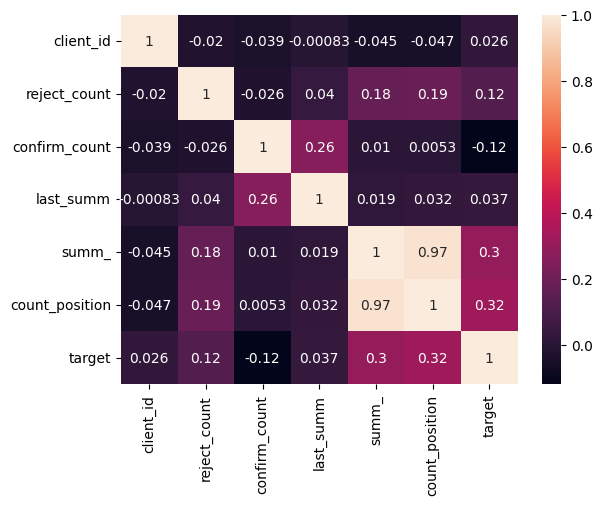

In [10]:
sns.heatmap(orders.corr(), annot=True)

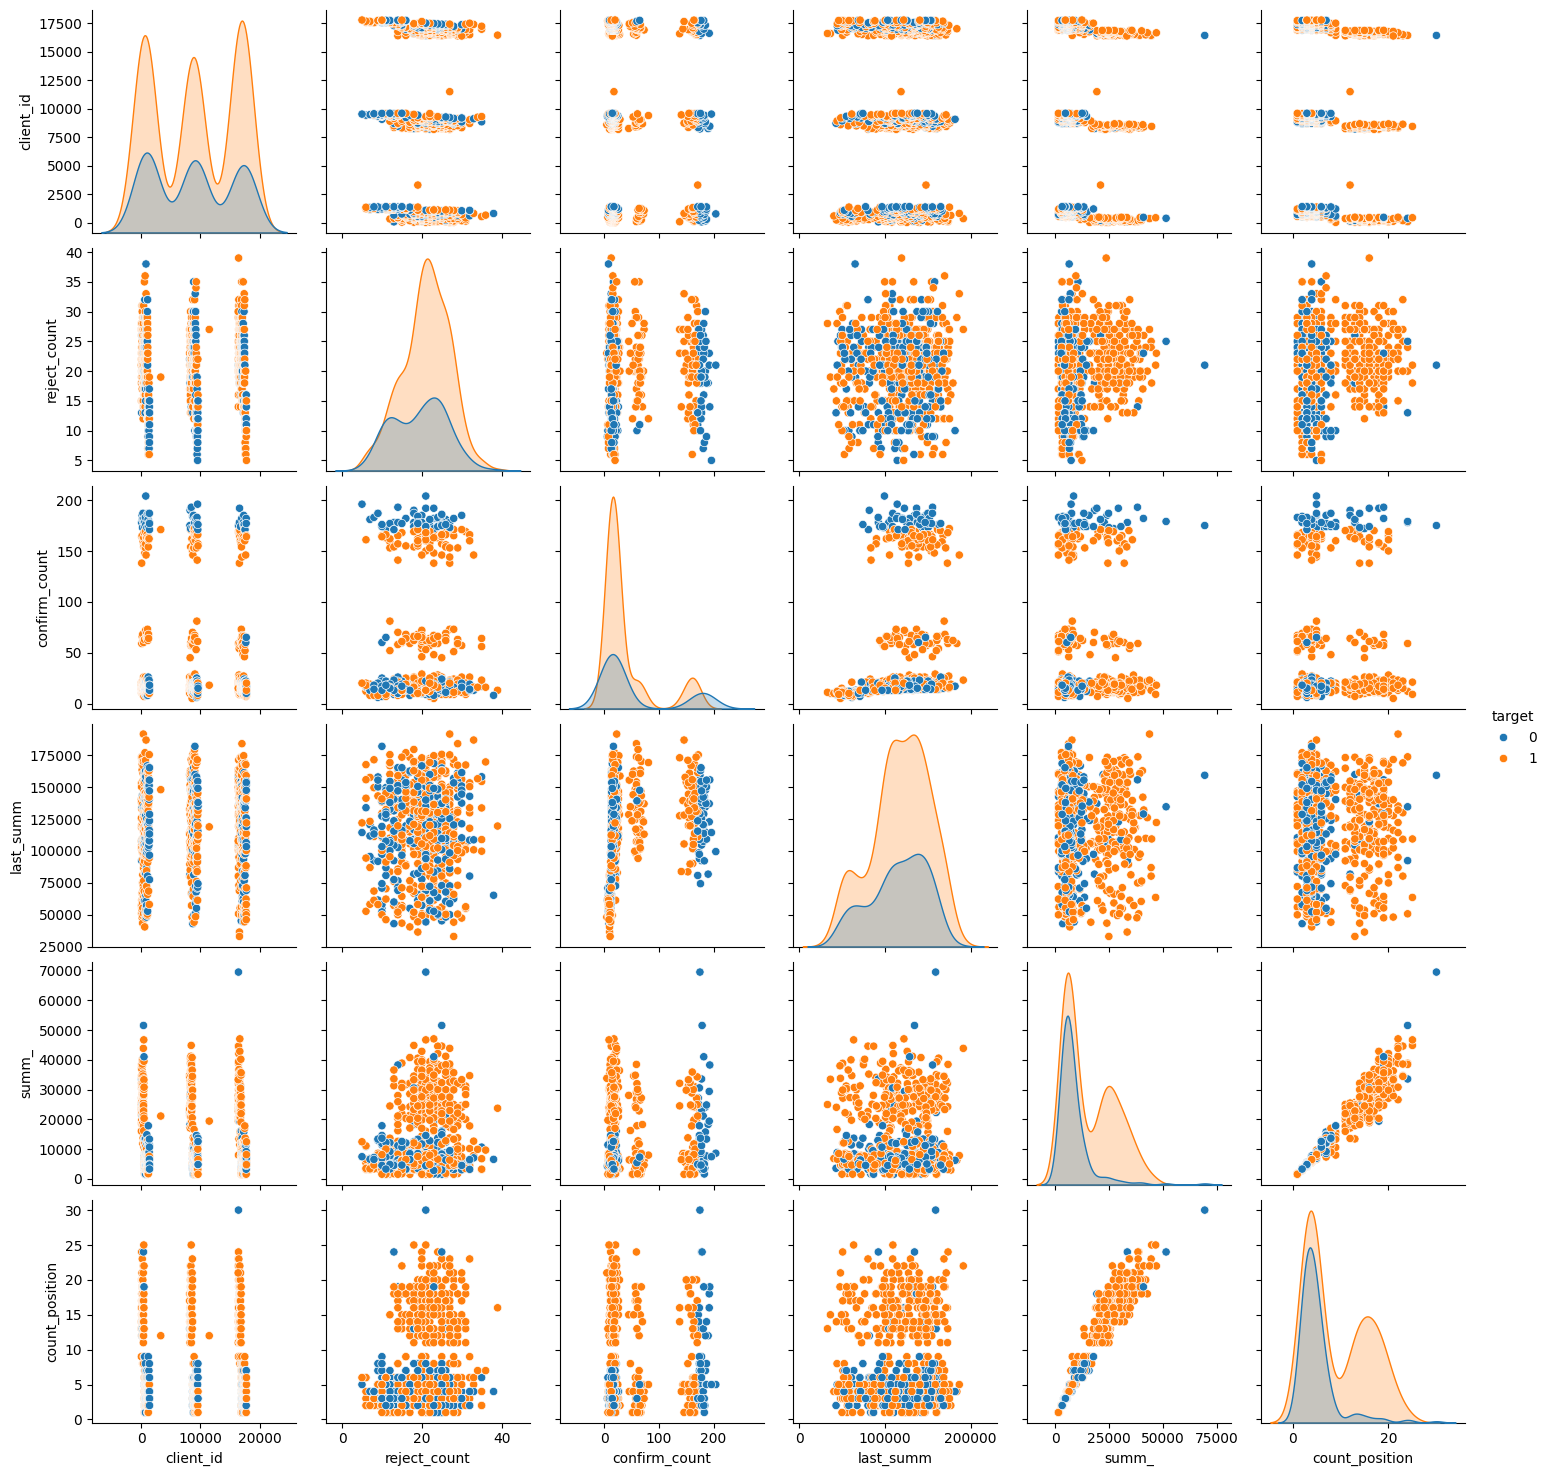

In [11]:
sns.pairplot(orders, hue='target')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score

In [13]:
RANDOM_STATE = 77

In [14]:
X = orders.drop(columns=['target', 'client_id', 'last_summ', 'summ_'])
y = orders['target'] 

In [15]:
scaler = StandardScaler()

In [16]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [17]:
X_train_scalled = scaler.fit_transform(X_train)

In [18]:
X_test_scalled = scaler.transform(X_test)

In [19]:
clf = LogisticRegression()

In [20]:
clf = clf.fit(X_train_scalled, y_train)

In [21]:
y_pred = clf.predict(X_test_scalled) 

In [22]:
accuracy_score(y_test, y_pred)

0.6648936170212766

In [23]:
from sklearn.svm import SVC

In [24]:
svc_clf = SVC()

In [25]:
svc_clf.fit(X_train_scalled, y_train)

SVC()

In [26]:
y_pred = svc_clf.predict(X_test_scalled)

In [27]:
accuracy_score(y_test, y_pred)

0.7340425531914894

In [28]:
from mlxtend.plotting import plot_decision_regions 

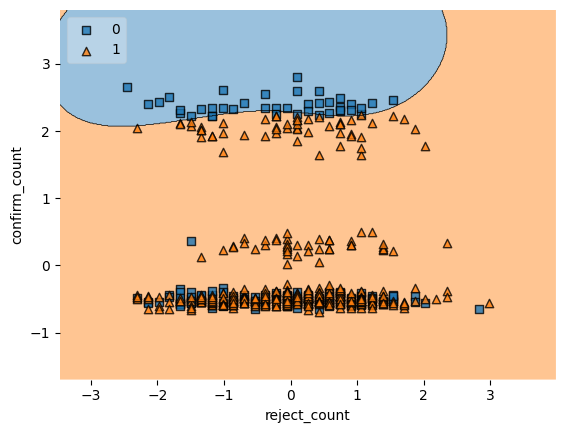

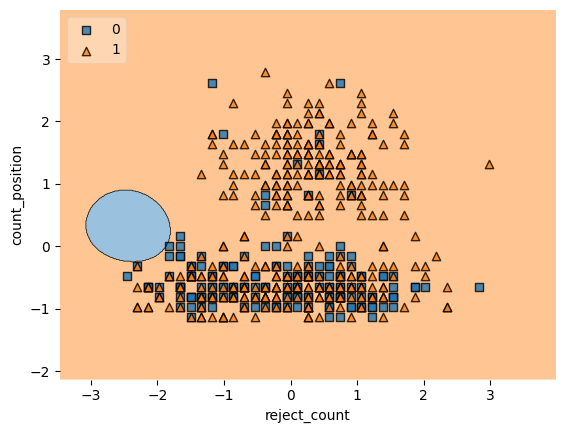

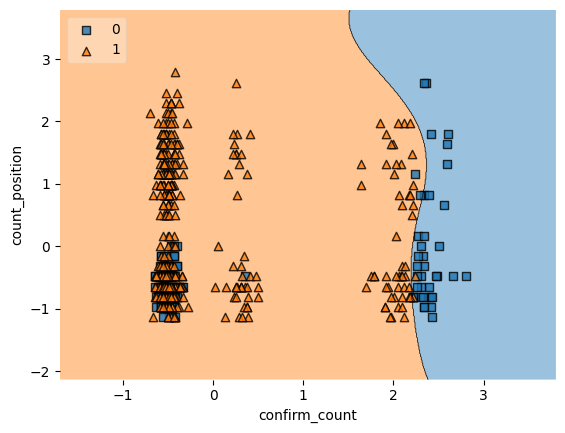

In [29]:
from itertools import combinations

# генерируем варианты разбивки признаков на пары без повторений
columns = list(X_train.columns)
all_variants = list(combinations(columns, 2))

# создаём и обучаем модель — она обучается на паре признаков и строит 
# для них разделяющую границу
for i in range(len(all_variants)):
    model = SVC()
    X_new_train = X_train[[all_variants[i][0], all_variants[i][1]]]
    X_new_scalled = scaler.fit_transform(X_new_train)
    model.fit(X_new_scalled, y_train)
    a = plot_decision_regions(X_new_scalled, y_train.to_numpy(), clf=model, legend=2)
    plt.xlabel(all_variants[i][0])
    plt.ylabel(all_variants[i][1])
    plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
X_train.head()

,reject_count,confirm_count,count_position
544,25,13,4
149,18,11,16
481,27,9,4
647,10,174,9
512,21,161,4


In [36]:
X_train.describe()

,reject_count,confirm_count,count_position
count,562.000000,562.000000,562.000000
mean,20.370107,44.745552,7.950178
std,6.245286,56.905943,6.124176
min,5.000000,5.000000,1.000000
25%,16.000000,14.000000,3.000000
50%,21.000000,17.000000,5.000000
75%,25.000000,26.000000,13.000000
max,39.000000,204.000000,25.000000


In [37]:
scaler = StandardScaler()

In [38]:
X_train_scaler = scaler.fit_transform(X_train)

In [39]:
X_train_scaler

array([[ 0.74200251, -0.55835702, -0.64558838],
       [-0.37984141, -0.59353405,  1.31560443],
       [ 1.06252934, -0.62871107, -0.64558838],
       ...,
       [ 0.10094884,  2.16786238, -0.64558838],
       [-1.50168533,  2.22062791, -0.80902111],
       [-1.50168533,  2.13268535, -0.31872291]])

In [40]:
model = KNeighborsClassifier()

In [41]:
model.fit(X_train_scaler, y_train)

KNeighborsClassifier()

In [42]:
X_test_scaller = scaler.transform(X_test)
predict_y = model.predict(X_test_scaller)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(predict_y, y_test)

0.723404255319149

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

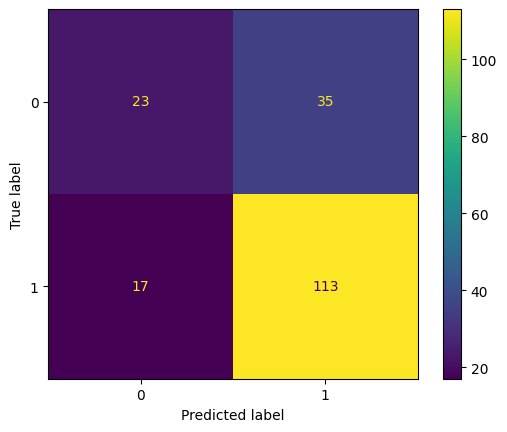

In [50]:
ConfusionMatrixDisplay.from_estimator(model, X_test_scaller, y_test)

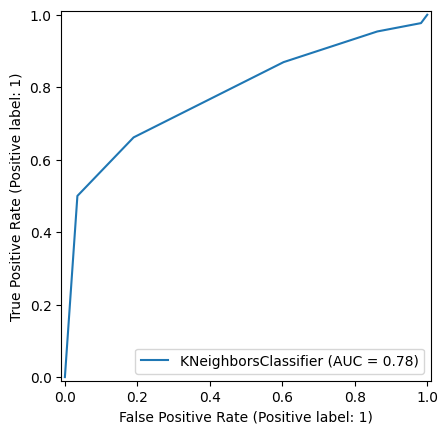

In [51]:
RocCurveDisplay.from_estimator(model, X_test_scalled, y_test)

In [52]:
from sklearn.dummy import DummyClassifier

In [53]:
dummy_model = DummyClassifier(random_state=48)
dummy_model.fit(X_train, y_train)

DummyClassifier(random_state=48)

In [57]:
dummy_model_pred = dummy_model.predict(X_test)

In [58]:
accuracy_score(y_test, dummy_model_pred)

0.6914893617021277

In [59]:
from sklearn.metrics import f1_score, roc_auc_score

In [61]:
dummy_proba = dummy_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, dummy_proba)

np.float64(0.5)

In [62]:
dummy_model.predict_proba(X_test)

array([[0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.29715302, 0.70284698],
       [0.

In [63]:
f1_score(y_test, dummy_model_pred)

0.8176100628930818

In [64]:
from imblearn.over_sampling import RandomOverSampler

In [65]:
sampler = RandomOverSampler(random_state=RANDOM_STATE)

In [69]:
X_resample, y_resample = sampler.fit_resample(X_train, y_train)

/Users/nikitanikitin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/nikitanikitin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [70]:
y_train.value_counts()

target
1    395
0    167
Name: count, dtype: int64

In [71]:
y_resample.value_counts()

target
0    395
1    395
Name: count, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE(random_state=42, k_neighbors=5)

In [76]:
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

/Users/nikitanikitin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [77]:
y_train_resample.value_counts()

target
0    395
1    395
Name: count, dtype: int64

In [78]:
X_train_resample.describe()

,reject_count,confirm_count,count_position
count,790.000000,790.000000,790.000000
mean,20.024051,47.292405,6.954430
std,6.254888,60.876440,5.640965
min,5.000000,5.000000,1.000000
25%,15.000000,14.000000,3.000000
50%,21.000000,17.000000,4.000000
75%,25.000000,25.750000,9.000000
max,39.000000,204.000000,25.000000


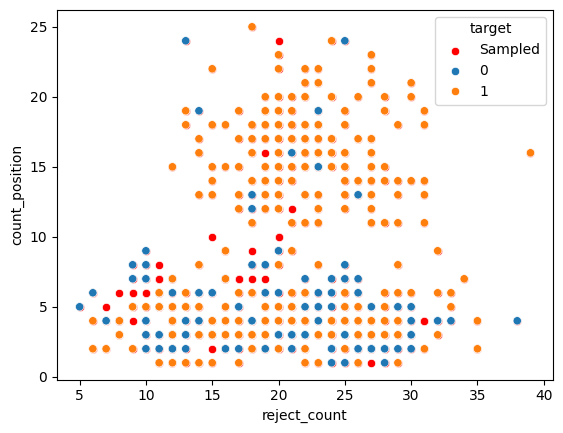

In [ ]:
import seaborn as sns

fig, axes = plt.subplots()

sns.scatterplot(x=X_train_resample['reject_count'], \
    y=X_train_resample['count_position'], \
    ax=axes, color='red', \
    label='Sampled')
sns.scatterplot(x=X_train['reject_count'], \
    y=X_train['count_position'], \
    hue=y_train, ax=axes)
plt.show() 

In [83]:
from imblearn.over_sampling import ADASYN

In [84]:
sampler = ADASYN(random_state=RANDOM_STATE)

In [85]:
X_resample, y_resample = sampler.fit_resample(X_train, y_train) 

/Users/nikitanikitin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


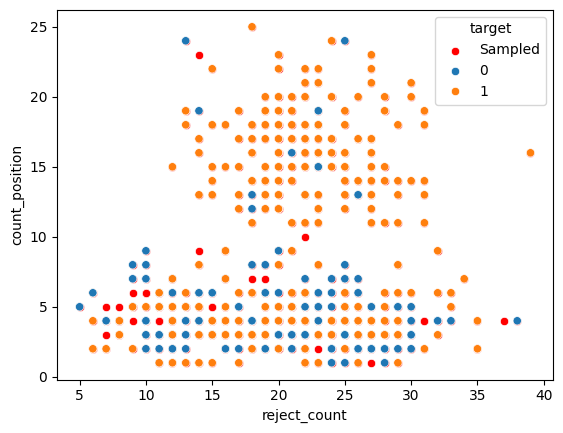

In [87]:
fig, axes = plt.subplots()

sns.scatterplot(x=X_resample['reject_count'], \
    y=X_resample['count_position'], \
    ax=axes, color='red', \
    label='Sampled')
sns.scatterplot(x=X_train['reject_count'], \
    y=X_train['count_position'], \
    hue=y_train, ax=axes)
plt.show() 

In [88]:
from imblearn.combine import SMOTETomek

In [89]:
sampler = SMOTETomek(random_state=RANDOM_STATE)

In [90]:
X_resample, y_resample = sampler.fit_resample(X_train, y_train)

/Users/nikitanikitin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/nikitanikitin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/nikitanikitin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


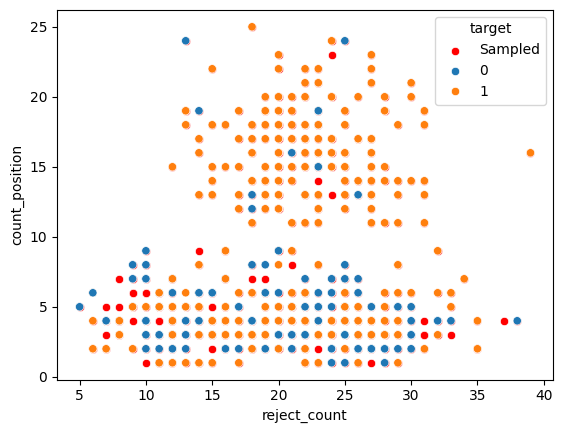

In [91]:
fig, axes = plt.subplots()

sns.scatterplot(x=X_resample['reject_count'], \
    y=X_resample['count_position'], \
    ax=axes, color='red', \
    label='Sampled')
sns.scatterplot(x=X_train['reject_count'], \
    y=X_train['count_position'], \
    hue=y_train, ax=axes)
plt.show() 

In [92]:
from sklearn.model_selection import KFold

In [105]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [106]:
kfold.split(orders)

<generator object _BaseKFold.split at 0x178ccb0b0>

In [107]:
count = 0
for train_split, test_split in kfold.split(orders):
    print('train_split', pd.DataFrame(train_split).head())
    print('test_split', pd.DataFrame(test_split).head(), '\n')
    count += 1

count

train_split    0
0  0
1  1
2  3
3  4
4  5
test_split     0
0   2
1   7
2  10
3  23
4  30 

train_split    0
0  0
1  1
2  2
3  3
4  4
test_split     0
0   6
1   9
2  11
3  15
4  18 

train_split    0
0  1
1  2
2  4
3  6
4  7
test_split     0
0   0
1   3
2   5
3  12
4  16 

train_split    0
0  0
1  1
2  2
3  3
4  4
test_split     0
0   8
1  26
2  36
3  37
4  50 

train_split    0
0  0
1  2
2  3
3  5
4  6
test_split     0
0   1
1   4
2  13
3  14
4  20 



5

In [108]:
from sklearn.model_selection import cross_val_score

In [114]:
cross_metrics = cross_val_score(model, X_train_scaler, y_train, scoring='accuracy')

In [116]:
np.array(cross_metrics).mean(), np.array(cross_metrics).std()

(np.float64(0.6708438685208596), np.float64(0.018929159571036983))

Моя метрика ниже :)

In [117]:
from sklearn.metrics import make_scorer

In [120]:
# создаём метрику из f1
def custom_metric(y_true, y_pred, class_weights):
    metric = f1_score(y_true, y_pred, sample_weight=[class_weights[y] for y in y_true])
    return metric



# создаём словарь с весами классов
# значения целевого признака — 0 и 1 
# задаём веса: вес класса 0 равен 1, класса 1 - 10
class_weights = {0: 1, 1: 10}



In [122]:
scorer = make_scorer(custom_metric, class_weights=class_weights)